<a href="https://colab.research.google.com/github/munich-ml/MLPy2021/blob/main/10_Logfile_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logfile challenge

## setup

This section prepares the coding challenge.

**Step 1**: Clone GitHub project `MLPy2021`


In [1]:
import os, sys

In [2]:
in_colab = 'google.colab' in sys.modules

if in_colab:
    print("executing in Google Colab")

    # Get munich-ml repo from GitHub
    if "MLPy2021" in os.listdir():
        !git -C MLPy2021 pull
    else:
        !git clone https://github.com/munich-ml/MLPy2021/
    
    filename = os.path.join("MLPy2021", "datasets", "logfile.csv")

else:
    print("executing in Jupyter")
    filename = os.path.join("datasets", "logfile.csv")

executing in Google Colab
Cloning into 'MLPy2021'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 93 (delta 47), reused 24 (delta 5), pack-reused 0
Unpacking objects: 100% (93/93), done.


**Step 2**: Open file `logfile.csv` and store content into variable `s`

In [3]:
with open(filename, "r") as file:
    s = file.read()

## The task

After executing the setup, the variable `s` should be available, holding the content of the logfile.

The task is to **parse the logfile content**.

In [4]:
print(s)

MLPy logfile challenge

header
measurement date,2021-04-06
measurement time,08:00:00
calibration factor sig0,0.55
calibration factor sig2,1.88

measurements
x,sig0,sig1,sig2
5.17,6.40 Ohms,16.05 Ohms,10.61 Ohms
9.47,34.21 Ohms,5.95 Ohms,293 mOhms
7.65,21.11 Ohms,366 mOhms,4.80 Ohms
2.82,36.06 Ohms,16.03 Ohms,6.39 Ohms
2.21,30.50 Ohms,11.65 Ohms,4.36 Ohms
6.86,6.92 Ohms,3.73 Ohms,7.39 Ohms
1.67,21.43 Ohms,7.45 Ohms,2.67 Ohms
3.92,28.49 Ohms,19.98 Ohms,9.47 Ohms
6.18,324 mOhms,8.59 Ohms,9.24 Ohms
4.12,25.24 Ohms,19.96 Ohms,9.84 Ohms
0.02,6 mOhms,2 mOhms,1 mOhms
8.84,36.11 Ohms,2.10 Ohms,1.35 Ohms
8.85,36.14 Ohms,2.14 Ohms,1.33 Ohms
3.00,36.36 Ohms,17.09 Ohms,6.98 Ohms
5.90,108 mOhms,10.82 Ohms,9.82 Ohms
9.78,30.57 Ohms,8.31 Ohms,49 mOhms
8.45,33.44 Ohms,621 mOhms,2.33 Ohms
0.65,4.06 Ohms,1.28 Ohms,438 mOhms
2.95,36.34 Ohms,16.77 Ohms,6.79 Ohms
2.88,36.22 Ohms,16.37 Ohms,6.57 Ohms
8.22,30.69 Ohms,155 mOhms,2.98 Ohms
6.26,679 mOhms,7.96 Ohms,9.05 Ohms
1.10,10.87 Ohms,3.53 Ohms,1.23 Ohms
0.

# Python built-in functions

The Python interpreter has a couple of functions build-in. They are available without any preparation. 

Complete list of built-in funcitons: https://docs.python.org/3/library/functions.html

Some prominent examples:
- `print`
- `type`
- `min`
- `len`




In [129]:
type(s)

str

... the datatype of the variable `s` is `str`, string. 

In [130]:
len(s)

1247

In [131]:
min(s)

'\n'

`min` returns the smallest item of a collection. Maybe not very helpful for an `str` type object.

# `str` objects

## Slicing

Single characters of the string can be accessed using their index in brakets `[index]`:




In [133]:
s[0]

'M'

In [134]:
s[-1]

's'

**Ranges** can be indexed by `[start_index : end_index]`.
The `start_index` is included, the `end_index` not!

In [135]:
s[10:60]

'le challenge\n\nheader\nmeasurement date,2021-04-06\nm'

In [138]:
first_line = s[:22]
first_line

'MLPy logfile challenge'

## `str` object methods

The `str` object not only contains **data**, it also contains **functions**, called **methods**.

In [139]:
first_line.upper()

'MLPY LOGFILE CHALLENGE'

In [140]:
first_line

'MLPy logfile challenge'

In [141]:
first_line = first_line.upper()

In [142]:
first_line

'MLPY LOGFILE CHALLENGE'

## Exercise with `str` objects
- Create a variable `my_name` holding your Name, 
- print the name in lower case, 
- check its length and
- check its type 

### Solution

In [16]:
my_name = "Holger Steffens"
my_name

'Holger Steffens'

In [17]:
print(my_name.lower())
print(len(my_name))
print(type(my_name))

holger steffens
15
<class 'str'>


## `split` method

In [18]:
first_line.split(" ")

['MLPY', 'LOGFILE', 'CHALLENGE\n\nHE']

Split the logfile content `s` on the *new line character* `\n`

In [19]:
lines = s.split("\n")
lines

['MLPy logfile challenge',
 '',
 'header',
 'measurement date,2021-04-06',
 'measurement time,08:00:00',
 'calibration factor sig0,0.55',
 'calibration factor sig2,1.88',
 '',
 'measurements',
 'x,sig0,sig1,sig2',
 '5.17,6.40 Ohms,16.05 Ohms,10.61 Ohms',
 '9.47,34.21 Ohms,5.95 Ohms,293 mOhms',
 '7.65,21.11 Ohms,366 mOhms,4.80 Ohms',
 '2.82,36.06 Ohms,16.03 Ohms,6.39 Ohms',
 '2.21,30.50 Ohms,11.65 Ohms,4.36 Ohms',
 '6.86,6.92 Ohms,3.73 Ohms,7.39 Ohms',
 '1.67,21.43 Ohms,7.45 Ohms,2.67 Ohms',
 '3.92,28.49 Ohms,19.98 Ohms,9.47 Ohms',
 '6.18,324 mOhms,8.59 Ohms,9.24 Ohms',
 '4.12,25.24 Ohms,19.96 Ohms,9.84 Ohms',
 '0.02,6 mOhms,2 mOhms,1 mOhms',
 '8.84,36.11 Ohms,2.10 Ohms,1.35 Ohms',
 '8.85,36.14 Ohms,2.14 Ohms,1.33 Ohms',
 '3.00,36.36 Ohms,17.09 Ohms,6.98 Ohms',
 '5.90,108 mOhms,10.82 Ohms,9.82 Ohms',
 '9.78,30.57 Ohms,8.31 Ohms,49 mOhms',
 '8.45,33.44 Ohms,621 mOhms,2.33 Ohms',
 '0.65,4.06 Ohms,1.28 Ohms,438 mOhms',
 '2.95,36.34 Ohms,16.77 Ohms,6.79 Ohms',
 '2.88,36.22 Ohms,16.37 Ohms,6

# `list` objects

In [146]:
type(lines)

list

In [147]:
len(lines)

40

In [148]:
lines[0]

'MLPy logfile challenge'

... this seems better than counting the first lines's characters and slicing the string manually!

`list` objects also support slicing:

In [150]:
lines[2:8]

['header',
 'measurement date,2021-04-06',
 'measurement time,08:00:00',
 'calibration factor sig0,0.55',
 'calibration factor sig2,1.88',
 '']

In [151]:
lines[8:]

['measurements',
 'x,sig0,sig1,sig2',
 '5.17,6.40 Ohms,16.05 Ohms,10.61 Ohms',
 '9.47,34.21 Ohms,5.95 Ohms,293 mOhms',
 '7.65,21.11 Ohms,366 mOhms,4.80 Ohms',
 '2.82,36.06 Ohms,16.03 Ohms,6.39 Ohms',
 '2.21,30.50 Ohms,11.65 Ohms,4.36 Ohms',
 '6.86,6.92 Ohms,3.73 Ohms,7.39 Ohms',
 '1.67,21.43 Ohms,7.45 Ohms,2.67 Ohms',
 '3.92,28.49 Ohms,19.98 Ohms,9.47 Ohms',
 '6.18,324 mOhms,8.59 Ohms,9.24 Ohms',
 '4.12,25.24 Ohms,19.96 Ohms,9.84 Ohms',
 '0.02,6 mOhms,2 mOhms,1 mOhms',
 '8.84,36.11 Ohms,2.10 Ohms,1.35 Ohms',
 '8.85,36.14 Ohms,2.14 Ohms,1.33 Ohms',
 '3.00,36.36 Ohms,17.09 Ohms,6.98 Ohms',
 '5.90,108 mOhms,10.82 Ohms,9.82 Ohms',
 '9.78,30.57 Ohms,8.31 Ohms,49 mOhms',
 '8.45,33.44 Ohms,621 mOhms,2.33 Ohms',
 '0.65,4.06 Ohms,1.28 Ohms,438 mOhms',
 '2.95,36.34 Ohms,16.77 Ohms,6.79 Ohms',
 '2.88,36.22 Ohms,16.37 Ohms,6.57 Ohms',
 '8.22,30.69 Ohms,155 mOhms,2.98 Ohms',
 '6.26,679 mOhms,7.96 Ohms,9.05 Ohms',
 '1.10,10.87 Ohms,3.53 Ohms,1.23 Ohms',
 '0.01,0 mOhms,0 mOhms,0 mOhms',
 '9.42,34.62 

## Exercise with `list` objects
Reuse the `my_name` variable and print the number of characters in your first and second name. E.g.:

> `Holger 6`
>
> `Steffens 8`

### Solution

In [25]:
my_names = my_name.split()   # using the default seperator of .split()
print(my_names[0], len(my_names[0]))
print(my_names[1], len(my_names[1]))

Holger 6
Steffens 8


# `for` loops

The next step in the *logfile challenge* requires looping. 

- **`for`, `in`** are keywords in Python, as well as
- **`while`**,
- and of course there are more keywords: [all Python keywords](https://docs.python.org/3/reference/lexical_analysis.html#keywords)

A *C-style* `for` loop such as:

>`lines[0]`
>
>`lines[1]`
>
>`...`

requires an *index variable*. 


In [26]:
for i in [0, 1, 2]:
    print(i)

0
1
2


The build-in function `range()` simplifies the loop:

In [27]:
for i in range(3):
    print(i)

0
1
2


## looping over the `lines` object

In [28]:
lines

['MLPy logfile challenge',
 '',
 'header',
 'measurement date,2021-04-06',
 'measurement time,08:00:00',
 'calibration factor sig0,0.55',
 'calibration factor sig2,1.88',
 '',
 'measurements',
 'x,sig0,sig1,sig2',
 '5.17,6.40 Ohms,16.05 Ohms,10.61 Ohms',
 '9.47,34.21 Ohms,5.95 Ohms,293 mOhms',
 '7.65,21.11 Ohms,366 mOhms,4.80 Ohms',
 '2.82,36.06 Ohms,16.03 Ohms,6.39 Ohms',
 '2.21,30.50 Ohms,11.65 Ohms,4.36 Ohms',
 '6.86,6.92 Ohms,3.73 Ohms,7.39 Ohms',
 '1.67,21.43 Ohms,7.45 Ohms,2.67 Ohms',
 '3.92,28.49 Ohms,19.98 Ohms,9.47 Ohms',
 '6.18,324 mOhms,8.59 Ohms,9.24 Ohms',
 '4.12,25.24 Ohms,19.96 Ohms,9.84 Ohms',
 '0.02,6 mOhms,2 mOhms,1 mOhms',
 '8.84,36.11 Ohms,2.10 Ohms,1.35 Ohms',
 '8.85,36.14 Ohms,2.14 Ohms,1.33 Ohms',
 '3.00,36.36 Ohms,17.09 Ohms,6.98 Ohms',
 '5.90,108 mOhms,10.82 Ohms,9.82 Ohms',
 '9.78,30.57 Ohms,8.31 Ohms,49 mOhms',
 '8.45,33.44 Ohms,621 mOhms,2.33 Ohms',
 '0.65,4.06 Ohms,1.28 Ohms,438 mOhms',
 '2.95,36.34 Ohms,16.77 Ohms,6.79 Ohms',
 '2.88,36.22 Ohms,16.37 Ohms,6

In [29]:
for i in range(len(lines)):
    line = lines[i]
    print(line)

MLPy logfile challenge

header
measurement date,2021-04-06
measurement time,08:00:00
calibration factor sig0,0.55
calibration factor sig2,1.88

measurements
x,sig0,sig1,sig2
5.17,6.40 Ohms,16.05 Ohms,10.61 Ohms
9.47,34.21 Ohms,5.95 Ohms,293 mOhms
7.65,21.11 Ohms,366 mOhms,4.80 Ohms
2.82,36.06 Ohms,16.03 Ohms,6.39 Ohms
2.21,30.50 Ohms,11.65 Ohms,4.36 Ohms
6.86,6.92 Ohms,3.73 Ohms,7.39 Ohms
1.67,21.43 Ohms,7.45 Ohms,2.67 Ohms
3.92,28.49 Ohms,19.98 Ohms,9.47 Ohms
6.18,324 mOhms,8.59 Ohms,9.24 Ohms
4.12,25.24 Ohms,19.96 Ohms,9.84 Ohms
0.02,6 mOhms,2 mOhms,1 mOhms
8.84,36.11 Ohms,2.10 Ohms,1.35 Ohms
8.85,36.14 Ohms,2.14 Ohms,1.33 Ohms
3.00,36.36 Ohms,17.09 Ohms,6.98 Ohms
5.90,108 mOhms,10.82 Ohms,9.82 Ohms
9.78,30.57 Ohms,8.31 Ohms,49 mOhms
8.45,33.44 Ohms,621 mOhms,2.33 Ohms
0.65,4.06 Ohms,1.28 Ohms,438 mOhms
2.95,36.34 Ohms,16.77 Ohms,6.79 Ohms
2.88,36.22 Ohms,16.37 Ohms,6.57 Ohms
8.22,30.69 Ohms,155 mOhms,2.98 Ohms
6.26,679 mOhms,7.96 Ohms,9.05 Ohms
1.10,10.87 Ohms,3.53 Ohms,1.23 Ohms
0.

## Adding an `if` statement

In [30]:
for i in range(len(lines)):
    line = lines[i]
    
    if line == "header":
        print("'" + line + "' found!")

'header' found!


## `list` objects are iterable

Iterable objects can be looped without using an index!

In [31]:
iter(lines)

In [32]:
for line in lines:     # this prototype is very common!
    
    if line == "header":
        print("'" + line + "' found!")

'header' found!


## Exercise with `for` loops
Reuse the `my_name` variable once again to number of characters for first and second name. Use a `for` loop this time.

### Solution

In [33]:
my_name

'Holger Steffens'

In [34]:
for name in my_name.split():
    print(name, len(name))

Holger 6
Steffens 8


## Search for multiple keys, simultaniously:

In [35]:
keys = ['measurements', "header"]

Two `for` loops could be used to search a list of possible keys on every line of the logfile:

In [36]:
for line in lines:
    for key in keys:
        if line == key:
            print("'" + line + "' found!")

'header' found!
'measurements' found!


... that works!

However, there is a more simple solution by using the `in` operator on a python container (such as a list):

In [37]:
"0815" in keys

False

In [38]:
"header" in keys

True

In [39]:
for line in lines:
    if line in keys:
        print("'" + line + "' found!")   

'header' found!
'measurements' found!


## `enumerate` operator

if an index is required, use `enumerate`

In [40]:
bag_of_words = ["Hello", "Team", "Python"]

for item in bag_of_words:
    print(item)

Hello
Team
Python


In [41]:
for item in enumerate(bag_of_words):
    print(item)

(0, 'Hello')
(1, 'Team')
(2, 'Python')


In [42]:
item

(2, 'Python')

In [43]:
type(item)

tuple

# `tuple` objects
**Tuples** are basic Python containers and similar to **lists**

In [44]:
item

(2, 'Python')

In [45]:
i, value = item
value

'Python'

... this is called `unpacking`.

Next, let's use `enumerate` and unpacking to search the lines for keys:

In [46]:
for lineNo, line in enumerate(lines):
    if line in keys:
        print("'" + line + "' found in line no. " + str(lineNo))   

'header' found in line no. 2
'measurements' found in line no. 8


Better using the `str.format()` method

In [47]:
"'{}' fount in line no. {}".format("world", 1)

"'world' fount in line no. 1"

In [48]:
for lineNo, line in enumerate(lines):
    if line in keys:
        print("'{}' fount in line no. {}".format(line, lineNo))   

'header' fount in line no. 2
'measurements' fount in line no. 8


## Exercise with `enumerate`
Find the position of all vocals `aeiou` in the `my_name` variable.

### Solution

In [49]:
VOCALS = "aeiou"
my_name

'Holger Steffens'

In [50]:
for position, character in enumerate(my_name):
    if character.lower() in VOCALS:
        print("vocal '{}' found a position {}".format(character, position))

vocal 'o' found a position 1
vocal 'e' found a position 4
vocal 'e' found a position 9
vocal 'e' found a position 12


# `dict` objects
`dcit` is a Python **dictionary**, holding `key`-->`value` pairs.

In [51]:
idxs = dict()

In [52]:
type(idxs)

dict

In [53]:
for lineNo, line in enumerate(lines):
    if line in keys:
        idxs[line] = lineNo 

In [54]:
idxs

{'header': 2, 'measurements': 8}

In [55]:
idxs["measurements"]

8

Adding more items to the dictionary

In [56]:
idxs["names"] = idxs["measurements"] + 1
idxs

{'header': 2, 'measurements': 8, 'names': 9}

In [57]:
idxs["params_begin"] = idxs["header"] + 1
idxs["params_end"] = idxs["measurements"] - 1
idxs["data"] = idxs["names"] + 1

In [58]:
idxs

{'data': 10,
 'header': 2,
 'measurements': 8,
 'names': 9,
 'params_begin': 3,
 'params_end': 7}

### `dict` methods



In [59]:
def print_object_attributes(obj):
    print("{} has the following (public) attributes:".format(obj.__class__))
    for attr in dir(obj):
        if not attr.startswith("__"):
            doc = getattr(obj, attr).__doc__.split("\n")[0]
            print(".{:25}{}".format(attr, doc))

In [60]:
print_object_attributes(idxs)

<class 'dict'> has the following (public) attributes:
.clear                    D.clear() -> None.  Remove all items from D.
.copy                     D.copy() -> a shallow copy of D
.fromkeys                 Create a new dictionary with keys from iterable and values set to value.
.get                      Return the value for key if key is in the dictionary, else default.
.items                    D.items() -> a set-like object providing a view on D's items
.keys                     D.keys() -> a set-like object providing a view on D's keys
.pop                      D.pop(k[,d]) -> v, remove specified key and return the corresponding value.
.popitem                  D.popitem() -> (k, v), remove and return some (key, value) pair as a
.setdefault               Insert key with a value of default if key is not in the dictionary.
.update                   D.update([E, ]**F) -> None.  Update D from dict/iterable E and F.
.values                   D.values() -> an object providing a view on

In [61]:
idxs.keys()

dict_keys(['header', 'measurements', 'names', 'params_begin', 'params_end', 'data'])

In [62]:
idxs.values()

dict_values([2, 8, 9, 3, 7, 10])

In [63]:
idxs.items()

dict_items([('header', 2), ('measurements', 8), ('names', 9), ('params_begin', 3), ('params_end', 7), ('data', 10)])

In [64]:
item = next(iter(idxs.items()))
print(item, type(item))

('header', 2) <class 'tuple'>


In [65]:
for x in idxs.keys():
    print(type(x), x)

<class 'str'> header
<class 'str'> measurements
<class 'str'> names
<class 'str'> params_begin
<class 'str'> params_end
<class 'str'> data


In [66]:
for x in idxs.values():
    print(type(x), x)

<class 'int'> 2
<class 'int'> 8
<class 'int'> 9
<class 'int'> 3
<class 'int'> 7
<class 'int'> 10


In [67]:
for x in idxs.items():
    print(type(x), x)

<class 'tuple'> ('header', 2)
<class 'tuple'> ('measurements', 8)
<class 'tuple'> ('names', 9)
<class 'tuple'> ('params_begin', 3)
<class 'tuple'> ('params_end', 7)
<class 'tuple'> ('data', 10)


The common way to loop over `dict` `items` is by **unpacking**:

In [68]:
for key, value in idxs.items():
    print("key: {:13} value: {}".format(key, value))

key: header        value: 2
key: measurements  value: 8
key: names         value: 9
key: params_begin  value: 3
key: params_end    value: 7
key: data          value: 10


## Exercise with `dict`
Count the characters within the `my_name` variable. Create a `characters` dictionary with
- each unique character as `key`, and
- the count as `value`.

Example:
`"Greg"` --> `{'g': 2, 'r': 1, 'e': 1}`

### Solution

In [69]:
characters = dict()
for c in my_name.lower():
    if c in characters.keys():
        characters[c] += 1
    else:
        characters[c] = 1

characters

{' ': 1,
 'e': 3,
 'f': 2,
 'g': 1,
 'h': 1,
 'l': 1,
 'n': 1,
 'o': 1,
 'r': 1,
 's': 2,
 't': 1}

# Table of Python containers
|Python container|list|tuple|set|dictionary|
|---|---|---|---|---|
|creation|`li = [1, 1, "Hi!"]`|`tup = (1, 1, "Hi!")`|`se = set([1, 1, "Hi!"])`|`d = {"Musk":"Elon", "Bezos":"Jeff"}`|
|print return|`[1, 1, 'Hi!']`|`(1, 1, 'Hi!')`|`{1, 'Hi!'}`|`{'Musk': 'Elon', 'Bezos': 'Jeff'}`|
|mutablility|mutable|**immutable**|mutable|mutable|
|slicing|yes, `li[0]` --> `1`|yes, `tup[0]` --> `1`|no slicing|no slicing|
|primary usage|basic container with<br>`append()` method|use if data doesn't<br>change|- get unique values<br>- set operations: `union`, `diff`,|lookup table|



# `set` objects

A Python `set` is a mutable container (it can grow like a `list`) that contains **unique values**.

Therefore, one typical use-case is getting the unique values of another container: 

In [70]:
set(my_name.lower())

{' ', 'e', 'f', 'g', 'h', 'l', 'n', 'o', 'r', 's', 't'}

`set` objects provide **set operations** as methods:

In [71]:
print_object_attributes(set())

<class 'set'> has the following (public) attributes:
.add                      Add an element to a set.
.clear                    Remove all elements from this set.
.copy                     Return a shallow copy of a set.
.difference               Return the difference of two or more sets as a new set.
.difference_update        Remove all elements of another set from this set.
.discard                  Remove an element from a set if it is a member.
.intersection             Return the intersection of two sets as a new set.
.intersection_update      Update a set with the intersection of itself and another.
.isdisjoint               Return True if two sets have a null intersection.
.issubset                 Report whether another set contains this set.
.issuperset               Report whether this set contains another set.
.pop                      Remove and return an arbitrary set element.
.remove                   Remove an element from a set; it must be a member.
.symmetric_differe

## `list` and `set` excercise

Create a list `c` that contains only the elements that are common between the lists `a` and `b` without their duplicates. 

In [72]:
a = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
b = [1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 10, 11, 13]

Solve the exercise with two different solutions:
1. use lists
2. use sets


### Half a solution containing *dupes*

In [73]:
c = []
for item in a:
    if item in b:
        c.append(item) 
c

[1, 1, 2, 3, 5, 8, 13]

### Solution using lists

In [74]:
c = []
for item in a:
    if item in b:
        if item not in c:
            c.append(item) 
c

[1, 2, 3, 5, 8, 13]

### Solution using sets

In [75]:
c = set(a).intersection(set(b))
c

{1, 2, 3, 5, 8, 13}

# Return to the 'Logfile challenge'

In [76]:
print(s)

MLPy logfile challenge

header
measurement date,2021-04-06
measurement time,08:00:00
calibration factor sig0,0.55
calibration factor sig2,1.88

measurements
x,sig0,sig1,sig2
5.17,6.40 Ohms,16.05 Ohms,10.61 Ohms
9.47,34.21 Ohms,5.95 Ohms,293 mOhms
7.65,21.11 Ohms,366 mOhms,4.80 Ohms
2.82,36.06 Ohms,16.03 Ohms,6.39 Ohms
2.21,30.50 Ohms,11.65 Ohms,4.36 Ohms
6.86,6.92 Ohms,3.73 Ohms,7.39 Ohms
1.67,21.43 Ohms,7.45 Ohms,2.67 Ohms
3.92,28.49 Ohms,19.98 Ohms,9.47 Ohms
6.18,324 mOhms,8.59 Ohms,9.24 Ohms
4.12,25.24 Ohms,19.96 Ohms,9.84 Ohms
0.02,6 mOhms,2 mOhms,1 mOhms
8.84,36.11 Ohms,2.10 Ohms,1.35 Ohms
8.85,36.14 Ohms,2.14 Ohms,1.33 Ohms
3.00,36.36 Ohms,17.09 Ohms,6.98 Ohms
5.90,108 mOhms,10.82 Ohms,9.82 Ohms
9.78,30.57 Ohms,8.31 Ohms,49 mOhms
8.45,33.44 Ohms,621 mOhms,2.33 Ohms
0.65,4.06 Ohms,1.28 Ohms,438 mOhms
2.95,36.34 Ohms,16.77 Ohms,6.79 Ohms
2.88,36.22 Ohms,16.37 Ohms,6.57 Ohms
8.22,30.69 Ohms,155 mOhms,2.98 Ohms
6.26,679 mOhms,7.96 Ohms,9.05 Ohms
1.10,10.87 Ohms,3.53 Ohms,1.23 Ohms
0.

In [77]:
print("'lines' is a {} container with {} items.".format(type(lines), len(lines)))
print("'idxs' is a {} container with {} items.".format(type(idxs), len(idxs)))

'lines' is a <class 'list'> container with 40 items.
'idxs' is a <class 'dict'> container with 6 items.


In [78]:
lines

['MLPy logfile challenge',
 '',
 'header',
 'measurement date,2021-04-06',
 'measurement time,08:00:00',
 'calibration factor sig0,0.55',
 'calibration factor sig2,1.88',
 '',
 'measurements',
 'x,sig0,sig1,sig2',
 '5.17,6.40 Ohms,16.05 Ohms,10.61 Ohms',
 '9.47,34.21 Ohms,5.95 Ohms,293 mOhms',
 '7.65,21.11 Ohms,366 mOhms,4.80 Ohms',
 '2.82,36.06 Ohms,16.03 Ohms,6.39 Ohms',
 '2.21,30.50 Ohms,11.65 Ohms,4.36 Ohms',
 '6.86,6.92 Ohms,3.73 Ohms,7.39 Ohms',
 '1.67,21.43 Ohms,7.45 Ohms,2.67 Ohms',
 '3.92,28.49 Ohms,19.98 Ohms,9.47 Ohms',
 '6.18,324 mOhms,8.59 Ohms,9.24 Ohms',
 '4.12,25.24 Ohms,19.96 Ohms,9.84 Ohms',
 '0.02,6 mOhms,2 mOhms,1 mOhms',
 '8.84,36.11 Ohms,2.10 Ohms,1.35 Ohms',
 '8.85,36.14 Ohms,2.14 Ohms,1.33 Ohms',
 '3.00,36.36 Ohms,17.09 Ohms,6.98 Ohms',
 '5.90,108 mOhms,10.82 Ohms,9.82 Ohms',
 '9.78,30.57 Ohms,8.31 Ohms,49 mOhms',
 '8.45,33.44 Ohms,621 mOhms,2.33 Ohms',
 '0.65,4.06 Ohms,1.28 Ohms,438 mOhms',
 '2.95,36.34 Ohms,16.77 Ohms,6.79 Ohms',
 '2.88,36.22 Ohms,16.37 Ohms,6

In [79]:
idxs

{'data': 10,
 'header': 2,
 'measurements': 8,
 'names': 9,
 'params_begin': 3,
 'params_end': 7}

Now we can **slice** the `lines` to more handy variables:

In [80]:
params_lines = lines[idxs["params_begin"] : idxs["params_end"]]
params_lines

['measurement date,2021-04-06',
 'measurement time,08:00:00',
 'calibration factor sig0,0.55',
 'calibration factor sig2,1.88']

In [81]:
data_lines = lines[idxs["data"] :]
data_lines

['5.17,6.40 Ohms,16.05 Ohms,10.61 Ohms',
 '9.47,34.21 Ohms,5.95 Ohms,293 mOhms',
 '7.65,21.11 Ohms,366 mOhms,4.80 Ohms',
 '2.82,36.06 Ohms,16.03 Ohms,6.39 Ohms',
 '2.21,30.50 Ohms,11.65 Ohms,4.36 Ohms',
 '6.86,6.92 Ohms,3.73 Ohms,7.39 Ohms',
 '1.67,21.43 Ohms,7.45 Ohms,2.67 Ohms',
 '3.92,28.49 Ohms,19.98 Ohms,9.47 Ohms',
 '6.18,324 mOhms,8.59 Ohms,9.24 Ohms',
 '4.12,25.24 Ohms,19.96 Ohms,9.84 Ohms',
 '0.02,6 mOhms,2 mOhms,1 mOhms',
 '8.84,36.11 Ohms,2.10 Ohms,1.35 Ohms',
 '8.85,36.14 Ohms,2.14 Ohms,1.33 Ohms',
 '3.00,36.36 Ohms,17.09 Ohms,6.98 Ohms',
 '5.90,108 mOhms,10.82 Ohms,9.82 Ohms',
 '9.78,30.57 Ohms,8.31 Ohms,49 mOhms',
 '8.45,33.44 Ohms,621 mOhms,2.33 Ohms',
 '0.65,4.06 Ohms,1.28 Ohms,438 mOhms',
 '2.95,36.34 Ohms,16.77 Ohms,6.79 Ohms',
 '2.88,36.22 Ohms,16.37 Ohms,6.57 Ohms',
 '8.22,30.69 Ohms,155 mOhms,2.98 Ohms',
 '6.26,679 mOhms,7.96 Ohms,9.05 Ohms',
 '1.10,10.87 Ohms,3.53 Ohms,1.23 Ohms',
 '0.01,0 mOhms,0 mOhms,0 mOhms',
 '9.42,34.62 Ohms,5.61 Ohms,347 mOhms',
 '1.42,16.5

Finally, let's slice the `names` line:

In [82]:
lines[idxs["names"]]

'x,sig0,sig1,sig2'

We can create a `names` `list` directy by splitting on `,`

In [83]:
names = lines[idxs["names"]].split(",")
names

['x', 'sig0', 'sig1', 'sig2']

In [84]:
params_lines

['measurement date,2021-04-06',
 'measurement time,08:00:00',
 'calibration factor sig0,0.55',
 'calibration factor sig2,1.88']

Storing the parameters is another perfect application for a dictionary

In [85]:
params = dict()
for line in params_lines:
    key, value = line.split(",")
    params[key] = value

params

{'calibration factor sig0': '0.55',
 'calibration factor sig2': '1.88',
 'measurement date': '2021-04-06',
 'measurement time': '08:00:00'}

perfect!

... see how readable the code get's in the following:

In [86]:
params["measurement date"]

'2021-04-06'

In order to **parse** the data effectively, we need to learn **funcitons** before.

# Functions
A function definition starts with the keyword **`def`** as follows:
**`def`**` function_name(parameters):`

Example:

In [87]:
def func_add(a, b):
    return a+b

In [88]:
func_add(4, 3)

7

## Exercise with a function

Write a function `name_splitter` that receies a `<str> name`, splits it at 'space' and returns a **`tuple`** with 1st and 2nd name.

In [89]:
my_name

'Holger Steffens'

### Solution

In [90]:
def name_splitter(name):
    """
    Splits the input <str> name on ' ' and returns a tuple.
    """
    return tuple(my_name.split(" "))

In [91]:
name_splitter(my_name)

('Holger', 'Steffens')

## Exercise advanced functions
Write a function `calc_fibunacci(z)` that returns the Fibunacci number for the input z. 

Here is how you calculate Fibunacci numbers:
- `Fibunacci(z) = `
> - `1, if z==0` 
> - `1, if z==1` 
> - `Fibunacci(z-2) + Fibunacci(z-1), else`  




### Solution

In [92]:
def calc_fibunacci(z):
    """
    Return the <int> fibunacci number of the input <int> z
    """
    if z in (0, 1):
        return 1

    return calc_fibunacci(z-2) + calc_fibunacci(z-1)

In [93]:
for i in range(10):
    fib = calc_fibunacci(i)
    print(f"calc_fibunacci({i}) = {fib}")

calc_fibunacci(0) = 1
calc_fibunacci(1) = 1
calc_fibunacci(2) = 2
calc_fibunacci(3) = 3
calc_fibunacci(4) = 5
calc_fibunacci(5) = 8
calc_fibunacci(6) = 13
calc_fibunacci(7) = 21
calc_fibunacci(8) = 34
calc_fibunacci(9) = 55


# Parsing the data

In [94]:
data_lines

['5.17,6.40 Ohms,16.05 Ohms,10.61 Ohms',
 '9.47,34.21 Ohms,5.95 Ohms,293 mOhms',
 '7.65,21.11 Ohms,366 mOhms,4.80 Ohms',
 '2.82,36.06 Ohms,16.03 Ohms,6.39 Ohms',
 '2.21,30.50 Ohms,11.65 Ohms,4.36 Ohms',
 '6.86,6.92 Ohms,3.73 Ohms,7.39 Ohms',
 '1.67,21.43 Ohms,7.45 Ohms,2.67 Ohms',
 '3.92,28.49 Ohms,19.98 Ohms,9.47 Ohms',
 '6.18,324 mOhms,8.59 Ohms,9.24 Ohms',
 '4.12,25.24 Ohms,19.96 Ohms,9.84 Ohms',
 '0.02,6 mOhms,2 mOhms,1 mOhms',
 '8.84,36.11 Ohms,2.10 Ohms,1.35 Ohms',
 '8.85,36.14 Ohms,2.14 Ohms,1.33 Ohms',
 '3.00,36.36 Ohms,17.09 Ohms,6.98 Ohms',
 '5.90,108 mOhms,10.82 Ohms,9.82 Ohms',
 '9.78,30.57 Ohms,8.31 Ohms,49 mOhms',
 '8.45,33.44 Ohms,621 mOhms,2.33 Ohms',
 '0.65,4.06 Ohms,1.28 Ohms,438 mOhms',
 '2.95,36.34 Ohms,16.77 Ohms,6.79 Ohms',
 '2.88,36.22 Ohms,16.37 Ohms,6.57 Ohms',
 '8.22,30.69 Ohms,155 mOhms,2.98 Ohms',
 '6.26,679 mOhms,7.96 Ohms,9.05 Ohms',
 '1.10,10.87 Ohms,3.53 Ohms,1.23 Ohms',
 '0.01,0 mOhms,0 mOhms,0 mOhms',
 '9.42,34.62 Ohms,5.61 Ohms,347 mOhms',
 '1.42,16.5

In [95]:
names

['x', 'sig0', 'sig1', 'sig2']

In [96]:
data_lines[0].split(",")

['5.17', '6.40 Ohms', '16.05 Ohms', '10.61 Ohms']

A function is needs that:
- takes a `str` input
- converts the `str` to a `float`
- removes `Ohms` text
- removes `mOhms` text and divides the value by 1000

Before programming the actual functionality, it is good practivce to write the test bench first:


In [97]:
test_vector = data_lines[0].split(",")    # reuse the first data line as test vector
test_vector[-1] = "990 mOhms"             # replace the last item, so there is a 'mOhms' item
test_vector

['5.17', '6.40 Ohms', '16.05 Ohms', '990 mOhms']

In [98]:
def string_to_float(s):
    return s + " processed by 'string_to_float'"

for item in test_vector:
    result = string_to_float(item)
    print(type(result), result)

<class 'str'> 5.17 processed by 'string_to_float'
<class 'str'> 6.40 Ohms processed by 'string_to_float'
<class 'str'> 16.05 Ohms processed by 'string_to_float'
<class 'str'> 990 mOhms processed by 'string_to_float'


How to convert a `str` to a `float`?

In [99]:
float("3.33")

3.33

In [100]:
float("3.33 ")

3.33

In [101]:
#float("3.33 Ohms")

Remove the "Ohms" first

In [102]:
for item in test_vector:
    print(item, "Ohms" in item)

5.17 False
6.40 Ohms True
16.05 Ohms True
990 mOhms True


... that would work.

However, using the `str.find` method has the advantage of providing the **index** where it was found.

In [103]:
for item in test_vector:
    print(item, item.find("Ohms"))

5.17 -1
6.40 Ohms 5
16.05 Ohms 6
990 mOhms 5


In [104]:
for item in test_vector:
    idx = item.find("Ohms")
    if idx > 0:
        prefix = item[idx-1]
        mults = {" ": 1, "m": 0.001}
        print(item, mults[prefix])
    else:
        print(item)

5.17
6.40 Ohms 1
16.05 Ohms 1
990 mOhms 0.001


... almost done!

Just to the *type casting* on the item and apply `mults`:

In [105]:
def string_to_float(s):
    idx = s.find("Ohms")
    if idx > 0:
        number = s.split(" ")[0]
        prefix = s[idx-1]
        return float(number) * {" ": 1, "m": 0.001}[prefix]

    return float(s)

In [106]:
test_vector

['5.17', '6.40 Ohms', '16.05 Ohms', '990 mOhms']

In [107]:
for item in test_vector:
    result = string_to_float(item)
    print(type(result), result)

<class 'float'> 5.17
<class 'float'> 6.4
<class 'float'> 16.05
<class 'float'> 0.99


Great, the function `string_to_float` works!

Let's use it for parsing the data:

In [108]:
data_lines

['5.17,6.40 Ohms,16.05 Ohms,10.61 Ohms',
 '9.47,34.21 Ohms,5.95 Ohms,293 mOhms',
 '7.65,21.11 Ohms,366 mOhms,4.80 Ohms',
 '2.82,36.06 Ohms,16.03 Ohms,6.39 Ohms',
 '2.21,30.50 Ohms,11.65 Ohms,4.36 Ohms',
 '6.86,6.92 Ohms,3.73 Ohms,7.39 Ohms',
 '1.67,21.43 Ohms,7.45 Ohms,2.67 Ohms',
 '3.92,28.49 Ohms,19.98 Ohms,9.47 Ohms',
 '6.18,324 mOhms,8.59 Ohms,9.24 Ohms',
 '4.12,25.24 Ohms,19.96 Ohms,9.84 Ohms',
 '0.02,6 mOhms,2 mOhms,1 mOhms',
 '8.84,36.11 Ohms,2.10 Ohms,1.35 Ohms',
 '8.85,36.14 Ohms,2.14 Ohms,1.33 Ohms',
 '3.00,36.36 Ohms,17.09 Ohms,6.98 Ohms',
 '5.90,108 mOhms,10.82 Ohms,9.82 Ohms',
 '9.78,30.57 Ohms,8.31 Ohms,49 mOhms',
 '8.45,33.44 Ohms,621 mOhms,2.33 Ohms',
 '0.65,4.06 Ohms,1.28 Ohms,438 mOhms',
 '2.95,36.34 Ohms,16.77 Ohms,6.79 Ohms',
 '2.88,36.22 Ohms,16.37 Ohms,6.57 Ohms',
 '8.22,30.69 Ohms,155 mOhms,2.98 Ohms',
 '6.26,679 mOhms,7.96 Ohms,9.05 Ohms',
 '1.10,10.87 Ohms,3.53 Ohms,1.23 Ohms',
 '0.01,0 mOhms,0 mOhms,0 mOhms',
 '9.42,34.62 Ohms,5.61 Ohms,347 mOhms',
 '1.42,16.5

The data is 2-dimensional: 
- 4 values per sample / row
- N rows

One potential solution for this application is a list of lists:

In [109]:
data = list()

for data_line in data_lines:
    row = list()
    for item in data_line.split(","):
        row.append(string_to_float(item))
    data.append(row)

data

[[5.17, 6.4, 16.05, 10.61],
 [9.47, 34.21, 5.95, 0.293],
 [7.65, 21.11, 0.366, 4.8],
 [2.82, 36.06, 16.03, 6.39],
 [2.21, 30.5, 11.65, 4.36],
 [6.86, 6.92, 3.73, 7.39],
 [1.67, 21.43, 7.45, 2.67],
 [3.92, 28.49, 19.98, 9.47],
 [6.18, 0.324, 8.59, 9.24],
 [4.12, 25.24, 19.96, 9.84],
 [0.02, 0.006, 0.002, 0.001],
 [8.84, 36.11, 2.1, 1.35],
 [8.85, 36.14, 2.14, 1.33],
 [3.0, 36.36, 17.09, 6.98],
 [5.9, 0.108, 10.82, 9.82],
 [9.78, 30.57, 8.31, 0.049],
 [8.45, 33.44, 0.621, 2.33],
 [0.65, 4.06, 1.28, 0.438],
 [2.95, 36.34, 16.77, 6.79],
 [2.88, 36.22, 16.37, 6.57],
 [8.22, 30.69, 0.155, 2.98],
 [6.26, 0.679, 7.96, 9.05],
 [1.1, 10.87, 3.53, 1.23],
 [0.01, 0.0, 0.0, 0.0],
 [9.42, 34.62, 5.61, 0.34700000000000003],
 [1.42, 16.57, 5.57, 1.97],
 [4.22, 23.51, 19.86, 10.01],
 [3.46, 34.25, 19.13, 8.35],
 [8.7, 35.46, 1.46, 1.68],
 [4.29, 22.22, 19.75, 10.11]]

**Status** on the logfile challenge. We got:
- `data` in a list of lists (N x 4)
- `names` list with column names
- `params` parameter dictionary

In [110]:
names

['x', 'sig0', 'sig1', 'sig2']

In [111]:
params

{'calibration factor sig0': '0.55',
 'calibration factor sig2': '1.88',
 'measurement date': '2021-04-06',
 'measurement time': '08:00:00'}

# Complete `parse_logfile_string` function

Let's summarize the functionality we got so far, into a function `parse_logfile_string` that:
- takes the logfile string `s` as input and
- returns `params`, `names` and `data`

In [112]:
def parse_logfile_string(s):
    # split the input string on "\n" new line
    lines = s.split("\n")

    # create a look-up table of sections and line numbers
    idxs = dict()
    for lineNo, line in enumerate(lines):
        if line in ['measurements', "header"]:
            idxs[line] = lineNo 
    idxs["names"] = idxs["measurements"] + 1
    idxs["params_begin"] = idxs["header"] + 1
    idxs["params_end"] = idxs["measurements"] - 1
    idxs["data"] = idxs["names"] + 1

    # parse the column 
    names = lines[idxs["names"]].split(",")

    # parse the params_lines list(str) into params dict{param: value}
    params = dict()
    for line in lines[idxs["params_begin"] : idxs["params_end"]]:
        key, value = line.split(",")
        params[key] = value

    # converts str to float incl. "Ohms" removal
    def string_to_float(s):
        idx = s.find("Ohms")
        if idx > 0:
            number = s.split(" ")[0]
            prefix = s[idx-1]
            return float(number) * {" ": 1, "m": 0.001}[prefix]
        return float(s)

    # parse data_lines list(str) into data list(list(floats))
    data = list()
    for data_line in lines[idxs["data"] :]:
        row = list()
        for item in data_line.split(","):
            row.append(string_to_float(item))
        data.append(row)

    return {"params": params, "names": names, "data":data}

In [113]:
log = parse_logfile_string(s)
log

{'data': [[5.17, 6.4, 16.05, 10.61],
  [9.47, 34.21, 5.95, 0.293],
  [7.65, 21.11, 0.366, 4.8],
  [2.82, 36.06, 16.03, 6.39],
  [2.21, 30.5, 11.65, 4.36],
  [6.86, 6.92, 3.73, 7.39],
  [1.67, 21.43, 7.45, 2.67],
  [3.92, 28.49, 19.98, 9.47],
  [6.18, 0.324, 8.59, 9.24],
  [4.12, 25.24, 19.96, 9.84],
  [0.02, 0.006, 0.002, 0.001],
  [8.84, 36.11, 2.1, 1.35],
  [8.85, 36.14, 2.14, 1.33],
  [3.0, 36.36, 17.09, 6.98],
  [5.9, 0.108, 10.82, 9.82],
  [9.78, 30.57, 8.31, 0.049],
  [8.45, 33.44, 0.621, 2.33],
  [0.65, 4.06, 1.28, 0.438],
  [2.95, 36.34, 16.77, 6.79],
  [2.88, 36.22, 16.37, 6.57],
  [8.22, 30.69, 0.155, 2.98],
  [6.26, 0.679, 7.96, 9.05],
  [1.1, 10.87, 3.53, 1.23],
  [0.01, 0.0, 0.0, 0.0],
  [9.42, 34.62, 5.61, 0.34700000000000003],
  [1.42, 16.57, 5.57, 1.97],
  [4.22, 23.51, 19.86, 10.01],
  [3.46, 34.25, 19.13, 8.35],
  [8.7, 35.46, 1.46, 1.68],
  [4.29, 22.22, 19.75, 10.11]],
 'names': ['x', 'sig0', 'sig1', 'sig2'],
 'params': {'calibration factor sig0': '0.55',
  'calibra

In [114]:
log.keys()

dict_keys(['params', 'names', 'data'])

done!

We successfully created a **function** `parse_logfile_string(s)` that parses the input text string `s` and returns a `dict` with 
- the header parameters `params`, 
- the actual data `data`,
- the data column names `names` 

# Limitations of Python basic containers

The Python general purpose container `list` worked great for reading and appending items from file. However, for further mathematical processing it's non-ideal, as we will see,...

## Apply calibration factors

The task:
- search the `params` for `calibration factor sig?` keys
- multiply all column values of `sig?` with the respective `calibration factor`


In [115]:
log = parse_logfile_string(s)
params = log["params"]
data = log["data"]
names = log["names"]

In [116]:
for param, cal_factor in params.items():
    if "calibration factor" in param:
        sig = param.split(" ")[-1]
        print("Signal={}, cal_factor={}".format(sig, cal_factor))

Signal=sig0, cal_factor=0.55
Signal=sig2, cal_factor=1.88


Next step is to index the data: Get all rows of a specific column...

In [117]:
names

['x', 'sig0', 'sig1', 'sig2']

In [118]:
names.index("sig0")

1

In [119]:
for param, cal_factor in params.items():
    if "calibration factor" in param:
        sig = param.split(" ")[-1]
        col_index = names.index(sig)
        print("Signal={}, col_index={}, cal_factor={}".format(sig, col_index, cal_factor))

Signal=sig0, col_index=1, cal_factor=0.55
Signal=sig2, col_index=3, cal_factor=1.88


Next, we need to index all rows of the col_index...

In [120]:
data[0]

[5.17, 6.4, 16.05, 10.61]

In [121]:
data[0][col_index]

10.61

The `list[rows][cols]` can't be sliced in `cols` first!

As a solution, we can iterate over the rows and access the `col_index` within each row:

In [122]:
for data_row in data:
    val = data_row[col_index]
    print(val)

10.61
0.293
4.8
6.39
4.36
7.39
2.67
9.47
9.24
9.84
0.001
1.35
1.33
6.98
9.82
0.049
2.33
0.438
6.79
6.57
2.98
9.05
1.23
0.0
0.34700000000000003
1.97
10.01
8.35
1.68
10.11


Put it all together:


In [123]:
data[:3]

[[5.17, 6.4, 16.05, 10.61],
 [9.47, 34.21, 5.95, 0.293],
 [7.65, 21.11, 0.366, 4.8]]

In [124]:
for param, cal_factor in params.items():
    if "calibration factor" in param:
        sig = param.split(" ")[-1]
        col_index = names.index(sig)

        for data_row in data:
            data_row[col_index] *= float(cal_factor)

In [125]:
data[:3]

[[5.17, 3.5200000000000005, 16.05, 19.946799999999996],
 [9.47, 18.815500000000004, 5.95, 0.5508399999999999],
 [7.65, 11.6105, 0.366, 9.024]]

This worked, **BUT**

it would be much more convenient and readable to have something like 

`data[:, col_index] *= cal_factor`

What we want is **arbitrary indexing** and **element-wise operations**!





Maybe we even want **labeled indexing** like

`data[:, sig] *= cal_factor`

## Array slicing for visualization

Another common usage is **arbitrary array slicing** for data visualization (e.g. using `matplotlib`)


In [126]:
names

['x', 'sig0', 'sig1', 'sig2']

In [127]:
x, y = list(), list()
for data_row in data:
    x.append(data_row[names.index("x")])
    y.append(data_row[names.index("sig0")])

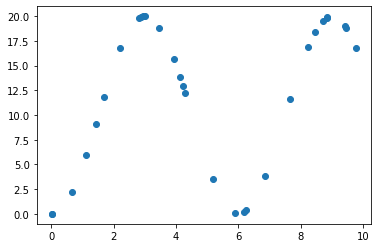

In [128]:
import matplotlib.pyplot as plt
plt.plot(x, y, "o");